<a href="https://colab.research.google.com/github/dualcircle/NOTEBOOKS/blob/main/IS_IT_OPEN%3F_Global_Market_Status_at_a_Glance_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS IT OPEN? Global Market Status at-a-Glance with Python

### The price of Bitcoin tends to correlate with stock market indices, so the market hours of stock exchanges should be factored into some trading strategies. IS IT OPEN? is obviously an important question in that arena.


### This post shares a Python tool used to consolidate and display open/closed statuses of several large stock exchanges around the globe. I find it a useful resource for Bitcoin trading.  

## Introduction

I've used the [World Stock Markets map](https://www.worldtimezone.com/markets24.php) on [worldtimezone.com](worldtimezone.com) for years to get a consolidated view of global market statuses. Lately though, I've wanted a more intuitive view of this information, so I decided to build a similar tool for my own use.

Below you'll find my Python code, pertinent links, and instructions for how to build it. 


## Description & Prospectus  

This tool  delivers the same services as the [World Stock Markets map](https://www.worldtimezone.com/markets24.php). That is, a map with data tables detailing major global markets’ open/closed hours and statuses. I find my tool a little more intuitive to read at-a-glance than www.worldtimezone.com (and easier on the eyes), even now in its rough, unfinished state. 

#### UNFINISHED
It is unfinished in that I still need to add the data for market holiday closures, which will take a little bit of effort for sure. I also intend to add data for some additional markets such as Singapore and Israel. Further down the line I would also like to visually integrate pre-post trading hours into the system for all applicable exchanges, and maybe, *maybe* put labels on the map - although I like how clean it looks as an unlabelled, [binary qualitative progression choropleth map](http://wiki.gis.com/wiki/index.php/Choropleth_map) 

Since everything below is just Python code at this point, you can simply copy it and use it for your own purposes. If you carry the work forward in the same direction as above, maybe we could collaborate on the project? Let me know. 

#### DISCLAIMER

Please note that like all tools of this kind, constant maintenance will be required in order for the data presented to stay up to date and accurate. 

Begin by installing and importing packages as applicable.  

In [1]:
!pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import datetime
from datetime import datetime
import pytz
import pandas as pd

utcmoment_naive = datetime.utcnow()
utcmoment = utcmoment_naive.replace(tzinfo=pytz.utc)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.4 MB/s 
     |████████████████████████████████| 16.7 MB 327 kB/s 
     |████████████████████████████████| 6.3 MB 5.6 MB/s 


<p>&nbsp;</p>

### List the exchanges, their timezones, and their open/close hours. You might notice, lunch hours are included in own list, these will be integrated into the system at a later date, currently WIP.
<p>&nbsp;</p>

These data are pulled from a variety of sources, most often [trading hours.com](https://www.tradinghours.com). If this tool ever really developed I'd want to pull the info right from the exchanges websites, as I've done for the [NZX exchange](https://www.nzx.com/services/nzx-trading/hours-boards).  

In [2]:

T_ZNES = ['Asia/Seoul',
 'Asia/Tokyo',
 'Asia/Hong_Kong',
 'Asia/Kolkata',
 'Asia/Kolkata',
 'Europe/Zurich',
 'Europe/Zurich',
 'Europe/Zurich',
 'Europe/Zurich',
 'Africa/Johannesburg',
 'Europe/London',
 'Australia/Sydney',
 'America/Argentina/Buenos_Aires',
 'America/New_York',
 'America/New_York',
 'America/Toronto',
 'Asia/Riyadh',
 'Asia/Shanghai',
 'Asia/Shanghai',
 'Asia/Shanghai',
 'Pacific/Auckland']


GLOBAL_XCHNGS=['Korea Exchange',
'Tokyo Stock Exchange',
'Stock Exchange of Hong Kong',
'National Stock Exchange of India',
'BSE Limited',
'Frankfurt Stock Exchange',
'SIX Swiss Exchange',
'Euronext Amsterdam',
'Nasdaq Stockholm AB',
'Johannesburg Stock Exchange',
'London Stock Exchange',
'Australian Securities Exchange',
'B3 S.A.',
'New York Stock Exchange',
'Nasdaq Stock Market',
'Toronto Stock Exchange',
'Saudi Stock Exchange',
'Shanghai Stock Exchange',
'Shenzhen Stock Exchange',
'Taiwan Stock Exchange',
'New Zealand Stock Exchange']

OPENS=['9:00:00',
'9:00:00',
'9:30:00',
'9:15:00',
'9:15:00',
'9:00:00',
'9:00:00',
'9:00:00',
'9:00:00',
'9:00:00',
'8:00:00',
'10:00:00',
'10:00:00',
'9:30:00',
'9:30:00',
'9:30:00',
'10:00:00',
'9:30:00',
'9:30:00',
'9:00:00',
'10:00:00']


CLOSES_OR_TAKES_LUNCH = ['15:30:00',
 '11:30:00',
 '12:00:00',
 '15:30:00',
 '15:30:00',
 '17:30:00',
 '17:20:00',
 '17:30:00',
 '17:25:00',
 '17:00:00',
 '12:00:00',
 '16:00:00',
 '17:55:00',
 '16:00:00',
 '16:00:00',
 '16:00:00',
 '15:00:00',
 '11:30:00',
 '11:30:00',
 '13:30:00',
 '16:45:00']

REOPEN_AFTER_LUNCH=['9:00:00',
'12:30:00',
'13:00:00',
'9:15:00',
'9:15:00',
'9:00:00',
'9:00:00',
'9:00:00',
'9:00:00',
'9:00:00',
'12:02:00',
'10:00:00',
'10:00:00',
'9:30:00',
'9:30:00',
'9:30:00',
'10:00:00',
'13:00:00',
'13:00:00',
'9:00:00',
'10:00:00']

TRUE_CLOSING_TIME = ['15:30:00',
 '15:00:00',
 '16:00:00',
 '15:30:00',
 '15:30:00',
 '17:30:00',
 '17:20:00',
 '17:30:00',
 '17:25:00',
 '17:00:00',
 '16:30:00',
 '16:00:00',
 '17:55:00',
 '16:00:00',
 '16:00:00',
 '16:00:00',
 '15:00:00',
 '15:00:00',
 '14:57:00',
 '13:30:00',
 '16:45:00']

Create formatting for datetimes

In [3]:
# Format of local time

LOCAL_TIME_FORMAT = "%Y-%m-%d %H:%M:%S"

# Format of local time without date info

LOCAL_TIME_FORMAT_NO_DATE = "%H:%M:%S"

Combines local times accessed with the pytz package and then combine all the info into a table, seperate out some datetime elements for use momentarily. 

In [4]:
"""# OPEN CLOSE 1"""

FIRST_OPEN=pd.to_datetime(pd.Series(OPENS), format="%H:%M:%S")
FIRST_OPEN=FIRST_OPEN.dt.strftime("%H:%M:%S")


FIRST_CLOSE_OR_LUNCH=pd.to_datetime(pd.Series(CLOSES_OR_TAKES_LUNCH), format="%H:%M:%S")
FIRST_CLOSE_OR_LUNCH=FIRST_CLOSE_OR_LUNCH.dt.strftime("%H:%M:%S")


"""# OPEN CLOSE 2"""

SECOND_OPEN_POST_LUNCH=pd.to_datetime(pd.Series(REOPEN_AFTER_LUNCH), format="%H:%M:%S")
SECOND_OPEN_POST_LUNCH=SECOND_OPEN_POST_LUNCH.dt.strftime("%H:%M:%S")


FINAL_CLOSING_TIME=pd.to_datetime(pd.Series(TRUE_CLOSING_TIME), format="%H:%M:%S")
FINAL_CLOSING_TIME=FINAL_CLOSING_TIME.dt.strftime("%H:%M:%S")

"""# LOCAL TIMES WITH DATE"""

TIMELIST_0=['LOCAL_TIME_WITH_DATE']

import pandas as pd
for tz in T_ZNES:
    localDatetime = utcmoment.astimezone(pytz.timezone(tz))
    TIMELIST_0.append(str(localDatetime.strftime(LOCAL_TIME_FORMAT)))
    #print(localDatetime.strftime(LOCAL_TIME_FORMAT))
LOCAL_TIMES_WITH_DATE=pd.DataFrame(TIMELIST_0)[1:].reset_index()
LOCAL_TIMES_WITH_DATE['LOCAL_TIME_WITH_DATE']=LOCAL_TIMES_WITH_DATE[0]

LOCAL_TIMES_WITH_DATE

"""# LOCAL TIMES WITHOUT DATE"""

TIMELIST_1=['LOCAL_TIME_WITHOUT_DATE']

import pandas as pd
for tz in T_ZNES:
    localDatetime = utcmoment.astimezone(pytz.timezone(tz))
    TIMELIST_1.append(str(localDatetime.strftime(LOCAL_TIME_FORMAT_NO_DATE)))
    #print(localDatetime.strftime(LOCAL_TIME_FORMAT))
LOCAL_TIMES_WITHOUT_DATE=pd.DataFrame(TIMELIST_1)[1:].reset_index()
LOCAL_TIMES_WITHOUT_DATE['LOCAL_TIME_WITHOUT_DATE']=LOCAL_TIMES_WITHOUT_DATE[0]

LOCAL_TIMES_WITHOUT_DATE

"""# EXGLOBAL_XCHNGS TO DF"""

LOCAL_TIMES_WITH_DATE['LOCAL_TIME_WITHOUT_DATE']=LOCAL_TIMES_WITHOUT_DATE['LOCAL_TIME_WITHOUT_DATE']
GLOBAL_XCHNGS=pd.Series(GLOBAL_XCHNGS)
GLOBAL_XCHNGS=pd.DataFrame(GLOBAL_XCHNGS)
GLOBAL_XCHNGS['GLOBAL_XCHNGS']=GLOBAL_XCHNGS[0]
GLOBAL_XCHNGS

"""# TIMEZONE KEYS TO DF"""

ZONES=pd.Series(T_ZNES)
ZONES=pd.DataFrame(ZONES)
ZONES

"""# DF with: TIMEZONE KEYS, EXGLOBAL_XCHNGS, LOCAL TIMES WITH AND WITHOUT DATES"""

ZONES['ZONES']=ZONES[0]
ZONES['CHNGES']=GLOBAL_XCHNGS['GLOBAL_XCHNGS']
ZONES['LOCAL_TIME_WITH_DATE']=LOCAL_TIMES_WITH_DATE['LOCAL_TIME_WITH_DATE']
ZONES['LOCAL_TIME_WITHOUT_DATE']=LOCAL_TIMES_WITHOUT_DATE['LOCAL_TIME_WITHOUT_DATE']
ZONES['TIMESORT']=pd.DataFrame(pd.to_datetime(ZONES['LOCAL_TIME_WITH_DATE'], format="%Y-%m-%d %H:%M:%S"))
ZONES=ZONES.drop([0, 'LOCAL_TIME_WITH_DATE'], axis=1)
ZONES



"""# NEW COLUMNS FOR MONTH, DAY, DAY OF WEEK"""

ZONES['MONTH'] = ZONES['TIMESORT'].dt.month

ZONES['DAY'] = ZONES['TIMESORT'].dt.day
ZONES['DAYOFWEEK'] = ZONES['TIMESORT'].dt.dayofweek

"""# ADD EXCHANGE OPEN AND CLOSE TO "zone" DATAFRAME"""

ZONES['FIRST_OPEN']=FIRST_OPEN
ZONES['FINAL_CLOSING_TIME']=FINAL_CLOSING_TIME

ZONES.index=ZONES['CHNGES']

ZONES.sort_values(by='TIMESORT')


,ZONES,CHNGES,LOCAL_TIME_WITHOUT_DATE,TIMESORT,MONTH,DAY,DAYOFWEEK,FIRST_OPEN,FINAL_CLOSING_TIME
CHNGES,,,,,,,,,
Nasdaq Stock Market,America/New_York,Nasdaq Stock Market,22:56:27,2022-06-04 22:56:27,6,4,5,09:30:00,16:00:00
New York Stock Exchange,America/New_York,New York Stock Exchange,22:56:27,2022-06-04 22:56:27,6,4,5,09:30:00,16:00:00
Toronto Stock Exchange,America/Toronto,Toronto Stock Exchange,22:56:27,2022-06-04 22:56:27,6,4,5,09:30:00,16:00:00
B3 S.A.,America/Argentina/Buenos_Aires,B3 S.A.,23:56:27,2022-06-04 23:56:27,6,4,5,10:00:00,17:55:00
London Stock Exchange,Europe/London,London Stock Exchange,03:56:27,2022-06-05 03:56:27,6,5,6,08:00:00,16:30:00
Johannesburg Stock Exchange,Africa/Johannesburg,Johannesburg Stock Exchange,04:56:27,2022-06-05 04:56:27,6,5,6,09:00:00,17:00:00
Euronext Amsterdam,Europe/Zurich,Euronext Amsterdam,04:56:27,2022-06-05 04:56:27,6,5,6,09:00:00,17:30:00
Nasdaq Stockholm AB,Europe/Zurich,Nasdaq Stockholm AB,04:56:27,2022-06-05 04:56:27,6,5,6,09:00:00,17:25:00
Frankfurt Stock Exchange,Europe/Zurich,Frankfurt Stock Exchange,04:56:27,2022-06-05 04:56:27,6,5,6,09:00:00,17:30:00


More data preparation next step, where we will crawl through to determine whether an exchange is open or closed at the moment. 

In [5]:
STAMPS=['STAMPS']
for i in range(len(ZONES)):
  STAMPS.append(pd.Timestamp(ZONES['TIMESORT'].iloc[i]).timestamp())#.values.astype('int')

CHECKR=pd.DataFrame(STAMPS[1:])
CHECKR

STAMPS=['STAMPS']
for i in range(len(ZONES)):
  STAMPS.append(pd.Timestamp(ZONES['TIMESORT'].iloc[i]).timestamp())#.values.astype('int')

CHECKR=pd.DataFrame(STAMPS[1:])
CHECKR

STAMPS=['opens']
for i in range(len(ZONES)):
  STAMPS.append(pd.Timestamp(ZONES['FIRST_OPEN'].iloc[i]))#.values.astype('int')
CHECKR['OPENRS']=pd.DataFrame(STAMPS[1:])
CHECKR

STAMPS=['closrs']
for i in range(len(ZONES)):
  STAMPS.append(pd.Timestamp(ZONES['FINAL_CLOSING_TIME'].iloc[i]))#.values.astype('int')
CHECKR['CLOSRS']=pd.DataFrame(STAMPS[1:])
CHECKR

STAMPS=['STAMPS']
for i in range(len(ZONES)):
  STAMPS.append(pd.Timestamp(ZONES['TIMESORT'].iloc[i]))#.values.astype('int')
CHECKR['CURRENT_TIME']=pd.DataFrame(STAMPS[1:])
CHECKR

CHECKR['OPEN_MONTH'] = CHECKR['OPENRS'].dt.month
CHECKR['OPEN_DAY'] = CHECKR['OPENRS'].dt.day
CHECKR['CLOSE_MONTH'] = CHECKR['CLOSRS'].dt.month
CHECKR['CLOSE_DAY'] = CHECKR['CLOSRS'].dt.day
CHECKR['NOW_MONTH'] = CHECKR['CURRENT_TIME'].dt.month
CHECKR['NOW_DAY'] = CHECKR['CURRENT_TIME'].dt.day
CHECKR

CHECKR.index=ZONES.index
CHECKR

ALREADYOPEN=['ALREADYOPEN']
ALREADYCLOSED=['ALREADYCLOSED']


Use a 'for' loop to check and report open/closed status of markets, and to append the lists we just made to include open/closed = True/False flags. Plus, it delivers natural language summaries of the calculation steps and market open/closed status per exchange for human evaluation. 

In [6]:
for i in range(len(CHECKR)):
  print(' ')
  print('****', CHECKR.index[i], '****')
  print(' ')
  print(' ')
  print('this is when it opens:', CHECKR['OPENRS'].iloc[i])
  print('this is when it CLOSES_OR_TAKES_LUNCH:', CHECKR['CLOSRS'].iloc[i])
  print('this is now:', CHECKR['CURRENT_TIME'].iloc[i])
  if int(CHECKR['OPEN_MONTH'].iloc[i]) is int(CHECKR['NOW_MONTH'].iloc[i]):
    print('same month')

    print ('SO CHECK THE ****DAY****')

    if int(CHECKR['OPEN_DAY'].iloc[i]) is int(CHECKR['NOW_DAY'].iloc[i]):
      print('same day')

      print('SO WAS IT ****ALREADY OPEN TODAY****? THE ANSWER IS:     ', CHECKR['OPENRS'][i]<CHECKR['CURRENT_TIME'][i])
      ALREADYOPEN.append(CHECKR['OPENRS'][i]<CHECKR['CURRENT_TIME'][i])

      print('AND WAS IT ****ALREADY CLOSED TODAY****? THE ANSWER IS:     ', CHECKR['CLOSRS'][i]<CHECKR['CURRENT_TIME'][i])
      ALREADYCLOSED.append(CHECKR['CLOSRS'][i]<CHECKR['CURRENT_TIME'][i])

    else:
      print('diff day: SUBTRACT A **DAY** FROM NOW DAY')
      print('      ')
      print(CHECKR['CURRENT_TIME'].iloc[i])
      print('THIS IS THE DATETIME WE USE IN THE CALCULATION: ', CHECKR['CURRENT_TIME'].iloc[i]-pd.Timedelta('1 day'))
      print('      ')

      print('SO WAS IT ****ALREADY OPEN TODAY****? THE ANSWER IS:     ', CHECKR['OPENRS'][i]<CHECKR['CURRENT_TIME'][i]-pd.Timedelta('1 day'))
      ALREADYOPEN.append(CHECKR['OPENRS'][i]<CHECKR['CURRENT_TIME'][i]-pd.Timedelta('1 day'))

      print('AND WAS IT ****ALREADY CLOSED TODAY****? THE ANSWER IS:     ', CHECKR['CLOSRS'][i]<CHECKR['CURRENT_TIME'][i]-pd.Timedelta('1 day'))
      ALREADYCLOSED.append(CHECKR['CLOSRS'][i]<CHECKR['CURRENT_TIME'][i]-pd.Timedelta('1 day'))

  else:
    print('diff day: SUBTRACT A **DAY** FROM NOW DAY')
    print('      ')
    print(CHECKR['CURRENT_TIME'].iloc[i])
    print('THIS IS THE DATETIME WE USE IN THE CALCULATION: ', CHECKR['CURRENT_TIME'].iloc[i]-pd.Timedelta('1 day'))
    print('      ')

    print('SO WAS IT ****ALREADY OPEN TODAY****? THE ANSWER IS:     ', CHECKR['OPENRS'][i]<CHECKR['CURRENT_TIME'][i]-pd.Timedelta('1 day'))
    ALREADYOPEN.append(CHECKR['OPENRS'][i]<CHECKR['CURRENT_TIME'][i]-pd.Timedelta('1 day'))
    print('AND WAS IT ****ALREADY CLOSED TODAY****? THE ANSWER IS:     ', CHECKR['CLOSRS'][i]<CHECKR['CURRENT_TIME'][i]-pd.Timedelta('1 day'))
    ALREADYCLOSED.append(CHECKR['CLOSRS'][i]<CHECKR['CURRENT_TIME'][i]-pd.Timedelta('1 day'))


 
**** Korea Exchange ****
 
 
this is when it opens: 2022-06-05 09:00:00
this is when it CLOSES_OR_TAKES_LUNCH: 2022-06-05 15:30:00
this is now: 2022-06-05 11:56:27
same month
SO CHECK THE ****DAY****
same day
SO WAS IT ****ALREADY OPEN TODAY****? THE ANSWER IS:      True
AND WAS IT ****ALREADY CLOSED TODAY****? THE ANSWER IS:      False
 
**** Tokyo Stock Exchange ****
 
 
this is when it opens: 2022-06-05 09:00:00
this is when it CLOSES_OR_TAKES_LUNCH: 2022-06-05 15:00:00
this is now: 2022-06-05 11:56:27
same month
SO CHECK THE ****DAY****
same day
SO WAS IT ****ALREADY OPEN TODAY****? THE ANSWER IS:      True
AND WAS IT ****ALREADY CLOSED TODAY****? THE ANSWER IS:      False
 
**** Stock Exchange of Hong Kong ****
 
 
this is when it opens: 2022-06-05 09:30:00
this is when it CLOSES_OR_TAKES_LUNCH: 2022-06-05 16:00:00
this is now: 2022-06-05 10:56:27
same month
SO CHECK THE ****DAY****
same day
SO WAS IT ****ALREADY OPEN TODAY****? THE ANSWER IS:      True
AND WAS IT ****ALREADY CL

Add the new lists as columns. Was the exchnage already open today? Was it already closed? We now have our answers in the last two columns.

In [7]:
CHECKR['ALRDYOPEN']=ALREADYOPEN[1:]
CHECKR['ALRDYCLOSE']=ALREADYCLOSED[1:]
CHECKR.sort_values(by='CURRENT_TIME',  ascending=False)

,0,OPENRS,CLOSRS,CURRENT_TIME,OPEN_MONTH,OPEN_DAY,CLOSE_MONTH,CLOSE_DAY,NOW_MONTH,NOW_DAY,ALRDYOPEN,ALRDYCLOSE
CHNGES,,,,,,,,,,,,
New Zealand Stock Exchange,1.654441e+09,2022-06-05 10:00:00,2022-06-05 16:45:00,2022-06-05 14:56:27,6,5,6,5,6,5,True,False
Australian Securities Exchange,1.654434e+09,2022-06-05 10:00:00,2022-06-05 16:00:00,2022-06-05 12:56:27,6,5,6,5,6,5,True,False
Tokyo Stock Exchange,1.654430e+09,2022-06-05 09:00:00,2022-06-05 15:00:00,2022-06-05 11:56:27,6,5,6,5,6,5,True,False
Korea Exchange,1.654430e+09,2022-06-05 09:00:00,2022-06-05 15:30:00,2022-06-05 11:56:27,6,5,6,5,6,5,True,False
Stock Exchange of Hong Kong,1.654427e+09,2022-06-05 09:30:00,2022-06-05 16:00:00,2022-06-05 10:56:27,6,5,6,5,6,5,True,False
Taiwan Stock Exchange,1.654427e+09,2022-06-05 09:00:00,2022-06-05 13:30:00,2022-06-05 10:56:27,6,5,6,5,6,5,True,False
Shenzhen Stock Exchange,1.654427e+09,2022-06-05 09:30:00,2022-06-05 14:57:00,2022-06-05 10:56:27,6,5,6,5,6,5,True,False
Shanghai Stock Exchange,1.654427e+09,2022-06-05 09:30:00,2022-06-05 15:00:00,2022-06-05 10:56:27,6,5,6,5,6,5,True,False
BSE Limited,1.654418e+09,2022-06-05 09:15:00,2022-06-05 15:30:00,2022-06-05 08:26:27,6,5,6,5,6,5,False,False


Next, use the open and closes statuses of markets to assign colors to the countries closest associated with the geographical locations of the exchanges. Blue means we are in open hours currently, black means we are outside market hours. 

In [8]:
CHECKR['ALRDYOPEN']

COLORER=['colors']
for i in range(len(CHECKR)):
  if str(CHECKR['ALRDYOPEN'][i]) is 'True':
    if str(CHECKR['ALRDYCLOSE'][i]) is 'False':
      COLORER.append('midnightblue')
    else:
      COLORER.append('k')
  else:
    COLORER.append('k')

Finally, make and execute a function that puts the color on the map using Geopandas.

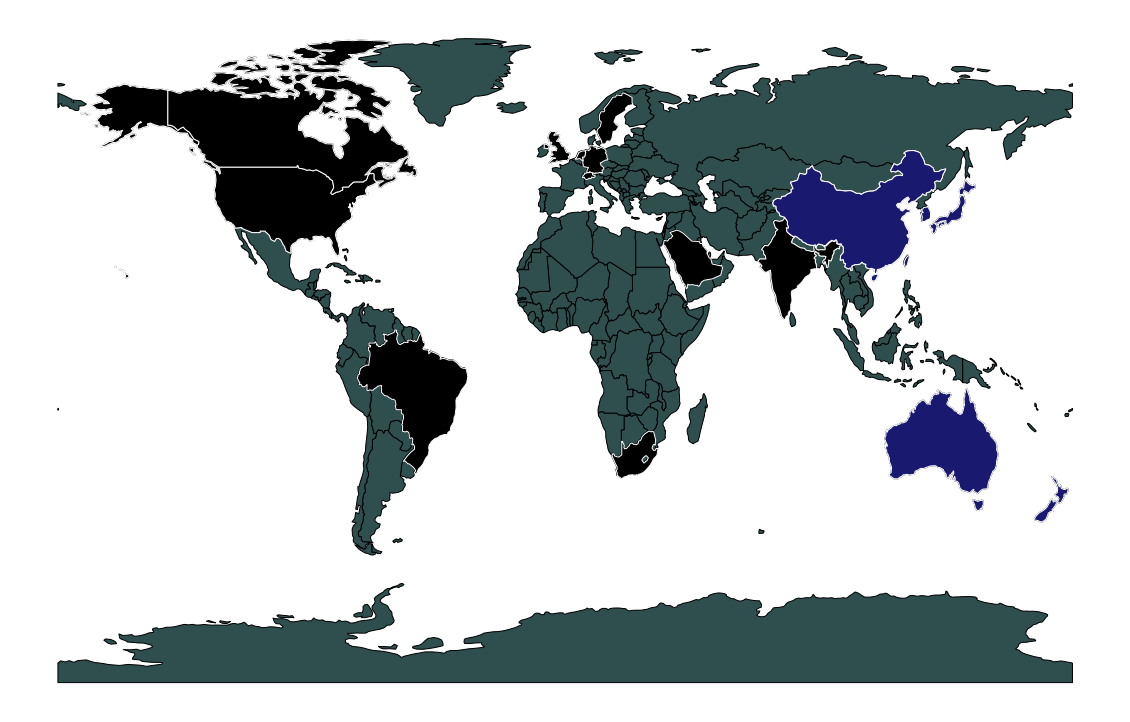

In [9]:
def MAPPER():

  WORLD = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

  ax2 = WORLD.plot(figsize=(20,30), edgecolor='k', color='darkslategrey')

  WORLD[WORLD.name == "South Korea"].plot(edgecolor=u'white', color=COLORER[1], ax=ax2)
  WORLD[WORLD.name == "Japan"].plot(edgecolor=u'white', color=COLORER[2], ax=ax2)
  WORLD[WORLD.name == "China"].plot(edgecolor=u'white', color=COLORER[3], ax=ax2)
  WORLD[WORLD.name == "India"].plot(edgecolor=u'white', color=COLORER[4], ax=ax2)
  WORLD[WORLD.name == "India"].plot(edgecolor=u'white', color=COLORER[5], ax=ax2)
  WORLD[WORLD.name == "Germany"].plot(edgecolor=u'white', color=COLORER[6], ax=ax2)
  WORLD[WORLD.name == "Switzerland"].plot(edgecolor=u'white', color=COLORER[7], ax=ax2)
  WORLD[WORLD.name == "Netherlands"].plot(edgecolor=u'white', color=COLORER[8], ax=ax2)
  WORLD[WORLD.name == "Sweden"].plot(edgecolor=u'white', color=COLORER[9], ax=ax2)
  WORLD[WORLD.name == "South Africa"].plot(edgecolor=u'white', color=COLORER[10], ax=ax2)
  WORLD[WORLD.name == "United Kingdom"].plot(edgecolor=u'white', color=COLORER[11], ax=ax2)
  WORLD[WORLD.name == "Australia"].plot(edgecolor=u'white', color=COLORER[12], ax=ax2)
  WORLD[WORLD.name == "Brazil"].plot(edgecolor=u'white', color=COLORER[13], ax=ax2)
  WORLD[WORLD.name == "United States of America"].plot(edgecolor='white', color=COLORER[14], ax=ax2)
  WORLD[WORLD.name == "United States of America"].plot(edgecolor='white', color=COLORER[15], ax=ax2)
  WORLD[WORLD.name == "Canada"].plot(edgecolor=u'white', color=COLORER[16], ax=ax2)
  WORLD[WORLD.name == "Saudi Arabia"].plot(edgecolor=u'white', color=COLORER[17], ax=ax2)
  WORLD[WORLD.name == "China"].plot(edgecolor=u'white', color=COLORER[18], ax=ax2)
  WORLD[WORLD.name == "China"].plot(edgecolor=u'white', color=COLORER[19], ax=ax2)
  WORLD[WORLD.name == "Taiwan"].plot(edgecolor=u'white', color=COLORER[20], ax=ax2)
  WORLD[WORLD.name == "New Zealand"].plot(edgecolor=u'white', color=COLORER[21], ax=ax2)

  ax2.axis('off') 
  plt.show()

MAPPER()


This data table holds all the key info for reference including current local time, opening, and closing times. 

In [10]:
CHECKR[CHECKR.columns[CHECKR.columns.isin(['OPENRS','CLOSRS', 'CURRENT_TIME', 'ALRDYOPEN' ,'ALRDYCLOSE'])]].sort_values(by='CURRENT_TIME', ascending=False).style.set_properties(**{'background-color': 'black',
                           'color': 'white',
                           'border-color': 'white'})

,OPENRS,CLOSRS,CURRENT_TIME,ALRDYOPEN,ALRDYCLOSE
CHNGES,,,,,
New Zealand Stock Exchange,2022-06-05 10:00:00,2022-06-05 16:45:00,2022-06-05 14:56:27,True,False
Australian Securities Exchange,2022-06-05 10:00:00,2022-06-05 16:00:00,2022-06-05 12:56:27,True,False
Tokyo Stock Exchange,2022-06-05 09:00:00,2022-06-05 15:00:00,2022-06-05 11:56:27,True,False
Korea Exchange,2022-06-05 09:00:00,2022-06-05 15:30:00,2022-06-05 11:56:27,True,False
Stock Exchange of Hong Kong,2022-06-05 09:30:00,2022-06-05 16:00:00,2022-06-05 10:56:27,True,False
Taiwan Stock Exchange,2022-06-05 09:00:00,2022-06-05 13:30:00,2022-06-05 10:56:27,True,False
Shenzhen Stock Exchange,2022-06-05 09:30:00,2022-06-05 14:57:00,2022-06-05 10:56:27,True,False
Shanghai Stock Exchange,2022-06-05 09:30:00,2022-06-05 15:00:00,2022-06-05 10:56:27,True,False
BSE Limited,2022-06-05 09:15:00,2022-06-05 15:30:00,2022-06-05 08:26:27,False,False
